In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(['Id','Species'],axis=1,inplace=True)


# Elbow Plot

In [5]:
sse = []
k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df.iloc[:,[0,1,2,3]])
    sse.append(km.inertia_)

sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.18920546865629,
 30.46652979373569,
 28.17195668220668]

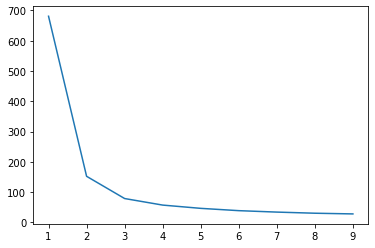

In [6]:
plt.plot(k_range,sse)

In [100]:
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df.iloc[:,:])
df['Cluster'] = y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [101]:
model.cluster_centers_[:,:]

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

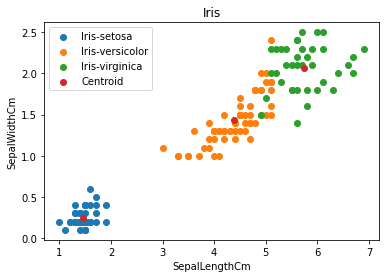

In [103]:
df0 = df[df['Cluster']==0]
df1 = df[df['Cluster']==1]
df2 = df[df['Cluster']==2]




plt.scatter(df0['PetalLengthCm'],df0['PetalWidthCm'],label='Iris-setosa',)
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],label='Iris-virginica')
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],label='Centroid')



plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Iris')

plt.legend()
